In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer
!pip install transformers

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-8z4drc1g
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-8z4drc1g
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6857 sha256=b673aac28cbbd08e3f158db7fa66c56c78d0981df72fc007868e21962db1ddc6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1s5sumee/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=5af98bfbe1422267a63d20d4c747726b1d6f0ef6

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split

from transformers import AutoModelForPreTraining, AutoTokenizer, AutoModelForSequenceClassification, BertModel, ElectraModel
from normalizer import normalize

import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models.resnet import ResNet50_Weights

import numpy as np
import pandas as pd
from PIL import Image

import cv2
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
rand_seed = 6
np.random.seed(rand_seed)
random.seed(rand_seed)
torch.manual_seed(rand_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
data = pd.read_excel('/content/drive/Shareddrives/TFQ/MemeSEN/multi-sent.xlsx')

label_map = {'neutral': 0, 'positive': 1, 'negative': 2}

Xc = data['Captions'].tolist()
Xi = np.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/Resized_224_Normalized.npy')

X = list(zip(Xc, Xi))
Y = [label_map[i] for i in data['Label_Sentiment']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=6, stratify=Y)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=1/3, random_state=6, stratify=Y_test)

In [ ]:
Xc_train, Xi_train = zip(*X_train)
Xc_valid, Xi_valid = zip(*X_valid)
Xc_test, Xi_test = zip(*X_test)

In [ ]:
pip install bnlp_toolkit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

from wordcloud import WordCloud

from collections import Counter

from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def get_text_language(text):
    text = text.translate(str.maketrans("", "", string.punctuation + '।'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]

    bangla_count = sum(1 for token in tokens if ((ord(token[0]) >= 2432 and ord(token[0]) <= 2559) or\
                                                 (ord(token[0]) >= 2534 and ord(token[0]) <= 2543)))
    english_count = sum(1 for token in tokens  if ((ord(token[0]) >= 97 and ord(token[0]) <= 122) or\
                                                  (ord(token[0]) >= 48 and ord(token[0]) <= 57)))
    if bangla_count == len(tokens):
        return "Bangla"
    elif 'no' in tokens and 'caption' in tokens:
        return "NoCap"
    elif english_count == len(tokens):
        return "English"
    else:
        return "Mixed"


data['Language'] = data['Captions'].apply(get_text_language)
print(data[['Captions', 'Language']])


#df.to_excel('/content/drive/MyDrive/Dataset/stat.xlsx')
data['Language'].value_counts()

                                               Captions Language
0     আম্মাঃ HSC চলে আসছে , এখন থেকে তোর মোবাইল , ল্...    Mixed
1     WHEN YOUR COUSINS TAKES YOU TO THE DHAN KHET A...  English
2     WHEN HE SAID 10 MINUTES BUT IT WAS ONLY 2 MINUTES  English
3     SHE - I CAN'T BE WITH YOU   -তবে শেষবারের মত দ...    Mixed
4     যখন কোন Teacher বলে   "সত্যটা বলো, তাহলে আর কি...    Mixed
...                                                 ...      ...
4363  আমি ফ্যান নিয়া আসছিলাম আমি টিউবলাইট লইয়া আইছি ...   Bangla
4364  এই ইয়ো ইয়ো পানি সিং আমার নাম পানি সিং না.. হান...   Bangla
4365  মেনশন করুন আপনার সেই সকল বন্ধু/বান্ধবীদের যারা...   Bangla
4366  ইতিহাস সাক্ষী যে স্বামী যত বেশি চুপচাপ এবং মিত...   Bangla
4367  বিউটি পার্লারে যাওয়ার আগে: বিউটি পার্লার থেকে ...   Bangla

[4368 rows x 2 columns]


Bangla     2511
Mixed      1389
English     451
NoCap        17
Name: Language, dtype: int64

In [ ]:
print(len(Xc_train))
print(len(Xc_valid))
print(len(Xc_test))

3057
437
874


In [ ]:
sum([1 for i in Y_train if i == 2])

1909

##### Extraction Process + SVM

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglishbert")
# model = ElectraModel.from_pretrained('csebuetnlp/banglishbert')
model = AutoModelForSequenceClassification.from_pretrained('csebuetnlp/banglishbert', num_labels=3)
model.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/BanglishBERT/BanglishBERT_19.pkl'))

model.classifier = torch.nn.Identity()
model.to(device)
model.eval()

In [ ]:
bert_pre_features = []

it = 0
with torch.no_grad():
  for text, _ in X:
    encoded = tokenizer.encode(
            normalize(text),
            return_tensors='pt'
          )
    encoded = encoded.to(device)
    output = model(encoded)
    # bert_pre_features.append(output['last_hidden_state'].flatten().to('cpu'))
    bert_pre_features.append(output['logits'][:, 0, :].flatten().to('cpu'))
    it = it + 1
    print(it)

In [ ]:
bert_pre_features = [i.numpy() for i in bert_pre_features]

In [ ]:
np.save('/content/drive/Shareddrives/TFQ/Model_Checkpoints/bert_pre_features.npy', np.array(bert_pre_features))

In [ ]:
bert_pre_features[0].shape

(768,)

In [ ]:
densenet161 = models.densenet161(weights=models.DenseNet161_Weights.IMAGENET1K_V1)

num_features = densenet161.classifier.in_features
densenet161.classifier = nn.Linear(num_features, 3)
densenet161.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/DenseNet/densenet161_5.pkl'))

densenet161.classifier = torch.nn.Identity()
densenet161.to(device)

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
densenet_pre_features = []

it = 0
with torch.no_grad():
  for _, image in X:
    image = transform(image).reshape(1, 3, 224, 224).to(device)
    output = densenet161(image)
    densenet_pre_features.append(output)
    it = it + 1
    print(it)

In [ ]:
densenet_pre_features = [i.to('cpu').numpy() for i in densenet_pre_features]

In [ ]:
np.save('/content/drive/Shareddrives/TFQ/Model_Checkpoints/densenet_trained_features.npy', np.array(densenet_pre_features))

In [ ]:
pretrained_BERT_X = np.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/bert_pre_features.npy')
trained_BERT_X = np.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/bert_trained_features.npy')

pretrained_DN_X = np.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/densenet_pre_features.npy')
trained_DN_X = np.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/densenet_trained_features.npy')

In [ ]:
pretrained_DN_X = pretrained_DN_X.reshape(-1, 2208)
trained_DN_X = trained_DN_X.reshape(-1, 2208)

In [ ]:
X = np.hstack((trained_BERT_X, trained_DN_X))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=6, stratify=Y)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=1/3, random_state=6, stratify=Y_test)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred = svm_model.predict(X_test)
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)
report = classification_report(Y_test, Y_pred, zero_division=1)
print(report)

[[  9  14  35]
 [ 13 159  98]
 [ 45  90 411]]
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        58
           1       0.60      0.59      0.60       270
           2       0.76      0.75      0.75       546

    accuracy                           0.66       874
   macro avg       0.50      0.50      0.50       874
weighted avg       0.67      0.66      0.66       874



##### Bert + Dense

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglishbert")
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
class NNModel(nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.bert = ElectraModel.from_pretrained('csebuetnlp/banglishbert')
        # self.bert = AutoModelForSequenceClassification.from_pretrained('csebuetnlp/banglishbert', num_labels=3)
        # self.bert.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/BanglishBERT/BanglishBERT_19.pkl'))
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        # self.densenet = models.densenet161(weights=models.DenseNet161_Weights.IMAGENET1K_V1)
        self.bert.classifier = torch.nn.Identity()
        self.resnet.fc = torch.nn.Identity()
        # self.densenet.classifier = torch.nn.Identity()
        self.l1 = torch.nn.Linear(768, 20)
        self.l2 = torch.nn.Linear(2048, 20)


        self.l3 = torch.nn.Linear(40, 3)

        # self.linear = torch.nn.Linear(768 + 2208, 3)
        # self.linear_1 = torch.nn.Linear(768 + 2048, 768)
        # self.linear_2 = torch.nn.Linear(768, 3)
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()

    def forward(self, input_ids, attention_mask, images):
        bx = self.bert(input_ids, attention_mask=attention_mask)
        bx = bx['last_hidden_state'][:, 0, :]
        # bx = bx['logits'][:, 0, :]
        # dx = self.densenet(images)
        dx = self.resnet(images)

        bx = self.l1(bx)
        bx = self.tanh(bx)

        dx = self.l2(dx)
        dx = self.tanh(dx)

        x = torch.cat((bx, dx), dim=1)

        x = self.l3(x)
        # x = self.linear_1(x)
        # x = self.tanh(x)
        # x = self.linear_2(x)
        return x

In [ ]:
mlt_model = NNModel()
mlt_model.to(device)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, images, labels, tokenizer, transform, max_length):
        self.texts = texts
        self.images = images
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.transform = transform

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            normalize(text),
            add_special_tokens=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt',
            return_token_type_ids=False,
            return_attention_mask=True,
            return_overflowing_tokens=False,
            return_special_tokens_mask=False,
            truncation=True,
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'images': self.transform(self.images[idx]),
            'label': label
        }

In [ ]:
class Sampler(object):
    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

class StratifiedSampler(Sampler):
    def __init__(self, class_vector, batch_size):
        self.n_splits = int(class_vector.size(0) / batch_size)
        self.class_vector = class_vector

    def gen_sample_array(self):
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=0.5)
        X = torch.randn(self.class_vector.size(0),2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return np.hstack([train_index, test_index])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)

In [ ]:
batch_size=32

sampler = StratifiedSampler(class_vector=torch.tensor(Y_train), batch_size=batch_size)
train_loader = DataLoader(CustomDataset(Xc_train, Xi_train, Y_train, tokenizer, transform, 85), batch_size=batch_size, sampler=sampler)
valid_loader = DataLoader(CustomDataset(Xc_valid, Xi_valid, Y_valid, tokenizer, transform, 85), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(CustomDataset(Xc_test, Xi_test, Y_test, tokenizer, transform, 85), batch_size=1, shuffle=False)

In [ ]:
type(Xi_test[1])

numpy.ndarray

In [ ]:
Xc_test[0]

'Cyclone: *arrives*      Sundarban :     আই অ্যাম সরি তোকে মরতে হবে '

In [ ]:
for idx, inputs in enumerate(test_loader):
  if idx == 0:
    print(idx)
    print(inputs['input_ids'].reshape(-1))
    print(tokenizer.decode(inputs['input_ids'].reshape(-1), skip_special_tokens=True))
    break


0
tensor([    2, 24084, 11195,  5661,    30,    14, 28875,    14, 21009,  1147,
        19177,    30,   980,  5787,  4689,  2438, 10859,   721,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0])
Cyclone : * arrives * Sundarban : আই অ্যাম সরি তোকে মরতে হবে


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(mlt_model.parameters(),
                              lr=0.00001,
                              betas=(0.9, 0.9999),
                              eps=1e-09,
                              weight_decay=0.08)

In [ ]:
path = '/content/drive/Shareddrives/TFQ/Model_Checkpoints/NTEST/'

def train_model(model, start, end, name):
  for epoch in range(start, end):
      model.train()
      running_loss = 0.0
      for inputs in train_loader:
          text = inputs['input_ids'].to(device)
          attention_mask = inputs['attention_mask'].to(device)
          images = inputs['images'].to(device)
          labels = inputs['label'].to(device)
          optimizer.zero_grad()
          outputs = model(text, attention_mask, images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss = loss.item()

      model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
          for inputs in valid_loader:
              text = inputs['input_ids'].to(device)
              attention_mask = inputs['attention_mask'].to(device)
              images = inputs['images'].to(device)
              labels = inputs['label'].to(device)
              outputs = model(text, attention_mask, images)
              _, predicted = torch.max(outputs, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      val_accuracy = correct / total
      torch.save(model.state_dict(), path + f'{name}_{epoch + 1}.pkl')
      print(f"Epoch {epoch + 1}/{end}, Loss: {running_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
train_model(mlt_model, 0, 5, 'NewBertRes')

Epoch 1/5, Loss: 0.5857, Validation Accuracy: 0.7162
Epoch 2/5, Loss: 0.5999, Validation Accuracy: 0.7094
Epoch 3/5, Loss: 0.2169, Validation Accuracy: 0.6293
Epoch 4/5, Loss: 0.0775, Validation Accuracy: 0.7391
Epoch 5/5, Loss: 0.0088, Validation Accuracy: 0.7231


In [ ]:
path = '/content/drive/Shareddrives/TFQ/Model_Checkpoints/NTEST/'

def train_model_wg(model, start, end, name):
    for epoch in range(start, end):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, inputs in enumerate(train_loader):
            text = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            images = inputs['images'].to(device)
            labels = inputs['label'].to(device)
            optimizer.zero_grad()
            outputs = model(text, attention_mask, images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if (i + 1) % (len(train_loader) // 5) == 0:
                print(f"Epoch {epoch + 1}/{end}, Step {i + 1}/{len(train_loader)}, Training Loss: {running_loss / (i + 1):.4f}, Training Accuracy: {correct / total:.4f}")
                model.eval()
                correct = 0
                total = 0
                val_running_loss = 0.0
                with torch.no_grad():
                    for j, inputs in enumerate(valid_loader):
                        text = inputs['input_ids'].to(device)
                        attention_mask = inputs['attention_mask'].to(device)
                        images = inputs['images'].to(device)
                        labels = inputs['label'].to(device)
                        outputs = model(text, attention_mask, images)
                        val_loss = criterion(outputs, labels)
                        val_running_loss += val_loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                print(f"Epoch {epoch + 1}/{end}, Step {i + 1}/{len(train_loader)}, Validation Loss: {val_running_loss / len(valid_loader):.4f}, Validation Accuracy: {correct / total:.4f}")
        # torch.save(model.state_dict(), path + f'{name}_{epoch + 1}.pkl')


In [ ]:
train_model_wg(mlt_model, 0, 4, 'BertRes')

In [ ]:
def get_report(model, weight):
    model.load_state_dict(torch.load(weight))
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs in test_loader:
            text = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            images = inputs['images'].to(device)
            labels = inputs['label'].to(device)
            outputs = model(text, attention_mask, images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
    return f'{confusion_matrix(y_true, y_pred)}\n{classification_report(y_true, y_pred)}'

In [ ]:
print(get_report(mlt_model, '/content/drive/Shareddrives/TFQ/Model_Checkpoints/MBertResNorm/BertRes_2.pkl'))

[[  0  12  46]
 [  0 180  90]
 [  0  84 462]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.65      0.67      0.66       270
           2       0.77      0.85      0.81       546

    accuracy                           0.73       874
   macro avg       0.47      0.50      0.49       874
weighted avg       0.68      0.73      0.71       874



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlt_model.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/MBertResNorm/BertRes_2.pkl'))

In [ ]:
def get_prediction_rep(model, weight):
    model.load_state_dict(torch.load(weight))
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs in test_loader:
            text = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            images = inputs['images'].to(device)
            labels = inputs['label'].to(device)
            outputs = model(text, attention_mask, images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
    return y_true, y_pred

In [ ]:
y_true, y_pred = get_prediction_rep(mlt_model, '/content/drive/Shareddrives/TFQ/Model_Checkpoints/NTEST/NewBertRes_4.pkl')

In [ ]:
PIL_image = Image.fromarray(np.uint8(Xi_test[0])).convert('RGB')

In [ ]:
for idx, iarr in enumerate(Xi_test):
  PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


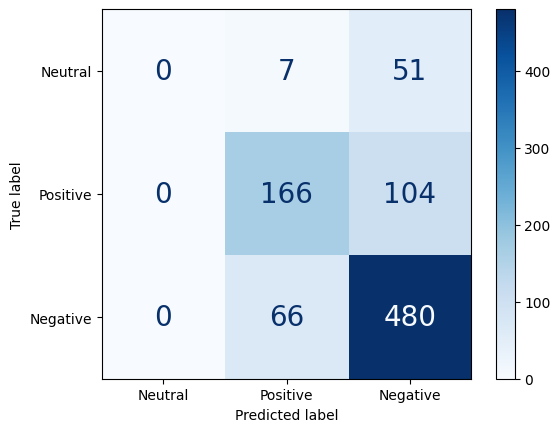

In [ ]:
arr = np.array([[  0,  7,  51],
 [  0, 166,  104],
 [ 0, 66, 480]])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = arr, display_labels = ['Neutral', 'Positive', 'Negative'])

cm_display.plot(cmap='Blues')
plt.setp(cm_display.text_, size=20)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json

import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F


In [ ]:
densenet161 = models.densenet161(weights=models.DenseNet161_Weights.IMAGENET1K_V1)
num_features = densenet161.classifier.in_features
densenet161.classifier = nn.Linear(num_features, 3)
densenet161.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/DenseNet/densenet161_5.pkl'))
densenet161.to(device)

In [ ]:
def batch_predict(images):
    densenet161.eval()
    batch = torch.stack(tuple(transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    densenet161.to(device)
    batch = batch.to(device)

    logits = densenet161(batch)
    probs = F.softmax(logits, dim=1)
    print(probs)
    return probs.detach().cpu().numpy()


In [ ]:
test_pred = batch_predict([Xi_test[221]])
test_pred.squeeze().argmax()

tensor([[0.0752, 0.0598, 0.8651]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


2

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bb765f26b4d758ffa0b78006f690a5e5b3cfd28ebc8d732a5e1148bbf93ef0d5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
import torch.nn.functional as F


In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt


In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(Xi[1391],
                                         batch_predict, # classification function
                                         top_labels=3,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function


  0%|          | 0/1000 [00:00<?, ?it/s]

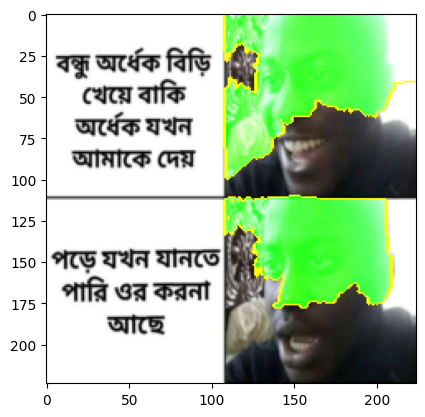

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)


In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)


AttributeError: ignored

In [ ]:
densenet161(transform(Xi[1780]).reshape(1, 3, 224, 224).to(device))

tensor([[-0.9013,  1.4347,  0.7031]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglishbert")
# model = ElectraModel.from_pretrained('csebuetnlp/banglishbert')
bbert = AutoModelForSequenceClassification.from_pretrained('csebuetnlp/banglishbert', num_labels=3)
bbert.load_state_dict(torch.load('/content/drive/Shareddrives/TFQ/Model_Checkpoints/BanglishBERT/BanglishBERT_19.pkl'))

bbert.to(device)
bbert.eval()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglishbert and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
encode = tokenizer.encode_plus(
            normalize(Xc_test[113]),
            add_special_tokens=True,
            padding='max_length',
            max_length=85,
            return_tensors='pt',
            return_token_type_ids=False,
            return_attention_mask=True,
            return_overflowing_tokens=False,
            return_special_tokens_mask=False,
            truncation=True,
        )
encode.to(device)

bbert(encode['input_ids'], encode['attention_mask'])

SequenceClassifierOutput(loss=None, logits=tensor([[-1.8968, -2.9201,  4.2942]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
y_true = []
y_pred = []
caps = []
with torch.no_grad():
    for inputs in test_loader:
        text = inputs['input_ids'].to(device)
        for seq in text:
          caps.append(tokenizer.decode(seq))
        attention_mask = inputs['attention_mask'].to(device)
        labels = inputs['label'].to(device)
        outputs = bbert(text, attention_mask)
        _, predicted = torch.max(outputs.logits, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

In [ ]:
for i, _ in enumerate(y_true):
  if y_true[i] == 0 and y_pred[i] != 0:
    print(caps[i])
    print(y_pred[i])

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4eaa02058bc72e04d493d7ece37fdb0e8613b57be58761de9b7f334f0d4b1867
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer


In [ ]:
def predict(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    inputs = inputs.to('cuda')
    with torch.no_grad():
        outputs = bbert(**inputs)
        probs = torch.softmax(outputs.logits, dim=1).to('cpu').numpy()
    return probs

explainer = LimeTextExplainer(class_names=['Neutral', 'Positive', 'Negative'])

# text = 'আমিঃ ওষুধ কিনতে আসছি     সেনাবাহিনীঃ কোন ওষুধ?     আমিঃ সিভিট '

text = Xc_test[709]

explanation = explainer.explain_instance(text, predict, num_features=6, top_labels=3)

explanation.show_in_notebook(text=True)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


NameError: ignored

In [ ]:
explanation.save_to_file('SameTempNeg.html')

In [ ]:
train_loss = [0.8983, 0.8589, 0.8225, 0.8000, 0.7808, 0.7218, 0.6828, 0.6804, 0.6862, 0.6747, 0.5978, 0.5405, 0.5130, 0.5003, 0.4909, 0.4121, 0.3850, 0.3560, 0.3438, 0.3289, 0.3407, 0.3013, 0.2844, 0.2707, 0.2674]
train_accu = [0.5839, 0.6325, 0.6842, 0.7091, 0.7263, 0.6957, 0.7206, 0.7282, 0.7187, 0.7282, 0.8010, 0.7904, 0.7943, 0.7952, 0.8086, 0.8964, 0.8239, 0.8383, 0.8364, 0.8431, 0.9145, 0.8105, 0.8344, 0.8565, 0.8459]

valid_loss = [0.8321, 0.7607, 0.7295, 0.7300, 0.7140, 0.7427, 0.6971, 0.6953, 0.6973, 0.6744, 0.6851, 0.7066, 0.6831, 0.6819, 0.6630, 0.6858, 0.7460, 0.7202, 0.7114, 0.7477, 0.8652, 0.7712, 0.7364, 0.7590, 0.8384]
valid_accu = [0.6247, 0.6865, 0.7140, 0.7140, 0.7208, 0.6613, 0.7208, 0.7162, 0.7140, 0.7391, 0.7277, 0.7277, 0.7277, 0.7368, 0.7460, 0.7277, 0.7117, 0.7231, 0.7185, 0.7208, 0.6453, 0.6796, 0.7300, 0.7162, 0.6911]

step =[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5]

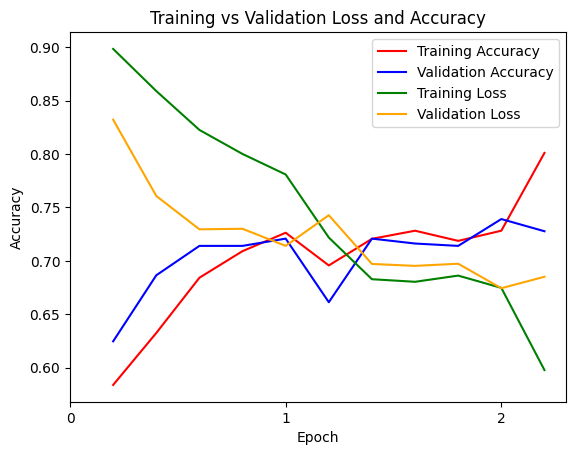

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.plot(step[:11], train_accu[:11], 'r', label='Training Accuracy')
plt.plot(step[:11], valid_accu[:11], 'b', label='Validation Accuracy')
plt.plot(step[:11], train_loss[:11], 'g', label='Training Loss')
plt.plot(step[:11], valid_loss[:11], label='Validation Loss', color='orange')

plt.xticks(np.array([0, 1, 2]))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Loss and Accuracy')
plt.legend()
plt.show()
fig.savefig('mlt_acc_vs_loss.png')

# fig = plt.figure()
# plt.xticks(np.array([0, 1, 2]))
# plt.xlabel('Epoch')
# plt.ylabel('Cross Entropy Loss')
# plt.title('Training vs Validation Loss')
# plt.legend()
# plt.show()
# fig.savefig('mlt_loss.png')